In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Assignment 3: Market Indices

Name: Tanay Kashyap

Student Number: 20938917

Due: 2021/10/29 at 11:59pm on Dropbox

What to submit: both your .ipynb and .pdf files.

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

## Rules
* Follow the format of the template notebook to complete this assignment
* Make sure to comment on any new variables and functions that you are using. If you are doubtful whether you should explain a part of your code, it is better to explain it. 
* Please make sure to conclude your final answers in a statement (if applicable) at the end of each question.
* AVOID hard-coding numbers, for example, if you want to know how many elements are in a string (and other data structures), use the len() method, DO NOT count the number by hand.

## Objectives
At the end of the assignment, you will:
* Understand the different methods to build a market index
* Understand how the value of a market index can change over time

## BONUS

After you have completed the assignment as instructed, you will hand in your two files.  The bonus part is separate from this, and saved under a new file titled "Market_Index_Bonus_NAME.ipynb" where NAME is your complete name.  You need only hand in your bonus code, thus if you are doing the bonus, you will hand in three files, two for the main assignment, and one for the bonus.  Please note that this bonus quesiton is not easy, and the bonus point will only be awarded if you are sucessful.  DO NOT hand in unsuccessful attempts.  Although this part is not worth much relative to the amount of work it will take, this level of coding will be required in the group assignment, and potentially in individual assignment 4.  Thus, it may be worth attempting so that you aren't overwhelmed later.

To complete the bonus part, you must write fully dynamic code that allows the user (your professor and the marker) to specify any (finite) number of (valid) US stock tickers to include in the index.  Your code must start by defining a list: Tickers = ["ticker1", "ticker2", "ticker3",...,"tickerN"]

We will test your code with a predefined list of tickers, the length of which is unknown to you (hint: it will be greater than 3, but not so large that it will take too long to call up all the market data and manipulate it).  We promise you that the tickers we use will be value US stocks that have complete data available for the time period in question.

### Data 

For this assignment, all the data will come from **Yahoo Finance**. This will be used to collect the stock information, and then you will use Python to complete the remainder of the assignment. 

**Language:** Python 

**Libraries Allowed:** pandas, matplotlib, yfinance

## Q1 - Building a Market Index

For this question, you will be using the given USD stocks to build your indices, there will be no need to do any currency conversion for this assignment. For this sample assignment, we will be using: 
* Mitsubishi UFJ Financial Group Inc (MUFG)
* Bank of America Corp (BAC)
* Seabord Corp (SEB)

We will be focusing on the two most common market index types, a price weighted index and a market capitalization index. Please refer to chapter 8 of the text and the corresponing class slides for a discussion of these two types of indices.  

For each index, determine the portfolio value based on the weights. This information should be stored in a DataFrame with a column for the date, each stock price, their respective weights and the final portfolio value at each point in time. 

For each method, use data from `Jan 1, 2018` to `Jan 1, 2021` to build the indices. The prices you use should be the **CLOSING** prices.

### a) Price Weighted Index
We will use the simplest method, as discussed in the class slides.  "In the simplest form, an average/price weighted index is calculated by adding each stock price and dividing by the # of stocks".  This is what the price weighted index will track over time.

Display the first five values of the date and portfolio value.

### b) Market Capitalisation Weighted Index
Each stock is weighted according to its market capitalization relative to the other stocks.  The beginning value of the index is arbitrary, it simply represents a size of your portfolio.  The key is that your portfolio is created according to the weights of each individual stock.  To allow us to compare the two index methods, you are to set the the **first market weighted index value equal to the first price weighted index value**.  If for example, the first price weighted index value is 1000, then you can imagine that this is the amount of money that you have to build your market capitalization index portfolio.   You will need to calculate the number of shares you purchase using the weights and prices of that first day. The next day you will update according to new prices and weightings to determine the next portfolio.   It may be helpful to imagine that at each day, you sell your portfolio at the prevailing prices, and then purchase a new portfolio according to the new weights with the money from the sold portfolio.  Although this may sound like a lot of details, it is precisely how the S&P 500 index is derived each day.

Display the first five values of the date and the respective portfolio values from the DataFrame.


**HINT:** It will be useful to have your DataFrame contain the prices of the stocks and the number of shares purchased of each stock for each day.

**HINT:** To obtain your index value at each point in time, you will require information from one period before.  This is best accomplished with the use of a for loop.

**ASSUMPTION:** To calculate the market capitalisation, you can make the assumption that the number of shares outstanding does not change and multiply that by the share price for each day.

In [5]:
# Part A
start_date='2018-01-01'
end_date='2021-01-01'

mufg=yf.Ticker('MUFG')
bac=yf.Ticker('BAC')
seb=yf.Ticker('SEB')

#get history for each stock
hist_mufg=mufg.history(start=start_date, end=end_date)
hist_bac=bac.history(start=start_date, end=end_date)
hist_seb=seb.history(start=start_date, end=end_date)

#add closing prices of each stock to dataframe
price_weighted_index=pd.DataFrame(hist_mufg['Close'])
price_weighted_index['BAC']=hist_bac['Close']
price_weighted_index['SEB']=hist_seb['Close']

#calculate weights of each stock
mufg_weight=price_weighted_index['Close']/(price_weighted_index['Close']+price_weighted_index['BAC']+price_weighted_index['SEB'])
bac_weight=price_weighted_index['BAC']/(price_weighted_index['Close']+price_weighted_index['BAC']+price_weighted_index['SEB'])
seb_weight=price_weighted_index['SEB']/(price_weighted_index['Close']+price_weighted_index['BAC']+price_weighted_index['SEB'])

#Add weights to dataframe
price_weighted_index['MUFG WEIGHT']=mufg_weight
price_weighted_index['BAC WEIGHT']=bac_weight
price_weighted_index['SEB WEIGHT']=seb_weight

#Calculate Portfolio Value
price_weighted_index['Portfolio Value']=(price_weighted_index['Close']+price_weighted_index['BAC']+price_weighted_index['SEB'])/3

#rename columns
price_weighted_index.columns=['MUFG','BAC','SEB','MUFG WEIGHT','BAC WEIGHT','SEB WEIGHT','Portfolio Value']

price_weighted_index.head(5)

,MUFG,BAC,SEB,MUFG WEIGHT,BAC WEIGHT,SEB WEIGHT,Portfolio Value
Date,,,,,,,
2018-01-02,7.35,27.561298,4334.924805,0.001682,0.006307,0.992011,1456.612034
2018-01-03,7.41,27.469122,4310.077148,0.001705,0.006322,0.991973,1448.318757
2018-01-04,7.58,27.828621,4347.527832,0.001729,0.006349,0.991921,1460.978818
2018-01-05,7.64,27.957668,4244.793945,0.001785,0.006532,0.991684,1426.797204
2018-01-08,7.67,27.764093,4194.730469,0.001813,0.006563,0.991623,1410.054854


In [3]:
#Part B

#calculate marketcap for each stock
mc_mufg=mufg.info['sharesOutstanding']*hist_mufg['Close']
mc_bac=bac.info['sharesOutstanding']*hist_bac['Close']
mc_seb=seb.info['sharesOutstanding']*hist_seb['Close']

#add closing prices of each stock to dataframe
cap_weighted_index=pd.DataFrame(hist_mufg['Close'])
cap_weighted_index['BAC']=hist_bac['Close']
cap_weighted_index['SEB']=hist_seb['Close']

#total market cap
total_market_cap=mc_mufg+mc_bac+mc_seb

#calculate weights of each stock using cap-weight-index formula
mc_weight_mufg=mc_mufg/total_market_cap
mc_weight_bac=mc_bac/total_market_cap
mc_weight_seb=mc_seb/total_market_cap

#adding weights to dataframe
cap_weighted_index['MUFG Weight']=mc_weight_mufg
cap_weighted_index['BAC Weight']=mc_weight_bac
cap_weighted_index['SEB Weight']=mc_weight_seb

# Getting the divisor for the free-float market capialization method for s&p 500
divisor=total_market_cap[0]/(price_weighted_index.loc['2018-01-02','Portfolio Value'])

# Calculating Index value using method from FTSE RUSSELL
market_cap_index_value=total_market_cap/divisor

#add index value to dataframe
cap_weighted_index['Portfolio Value']=market_cap_index_value

#rename columns
cap_weighted_index.columns=['MUFG','BAC','SEB','MUFG WEIGHT','BAC WEIGHT','SEB WEIGHT','Portfolio Value']

cap_weighted_index.head(5)

,MUFG,BAC,SEB,MUFG WEIGHT,BAC WEIGHT,SEB WEIGHT,Portfolio Value
Date,,,,,,,
2018-01-02,7.35,27.561302,4334.925293,0.288910,0.695679,0.015412,1456.612198
2018-01-03,7.41,27.469124,4310.076660,0.291285,0.693391,0.015324,1456.529779
2018-01-04,7.58,27.828615,4347.527344,0.293307,0.691478,0.015216,1479.674453
2018-01-05,7.64,27.957670,4244.794922,0.294108,0.691112,0.014780,1487.322693
2018-01-08,7.67,27.764095,4194.730469,0.296391,0.688948,0.014661,1481.664033


In [4]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q2 - Visualizing Index Over Time

Using the indices created in Question 1, create a 2 x 1 subplot using `matplotlib` that visualizes the portfolio (index) value over time for each method. Make sure to include appropriate titles, subplot titles, and axis labels. You will be creating this graph for two time-periods.

### a) Daily 
Visualize the daily portfolio value over time.

### b) Monthly
Visualize the monthly portfolio value over time.  To do this, graph the portfolio value at the first date available of every month for both methods. Create a function that does the heavy lifting: it should through all of the months.  The name of the function should be get_monthly_data.  It should take in a dataFrame as a parameter (this dataframe will contain daily data), and return a new dataframe with monthly data.

### c) Compare a) and b)
Discuss the difference(s) between the plots using daily and monthly data. What do you notice between the two different indices (price versus market cap weighted)? How are they similar/different?

In [5]:
%%latex
\newpage

<IPython.core.display.Latex object>

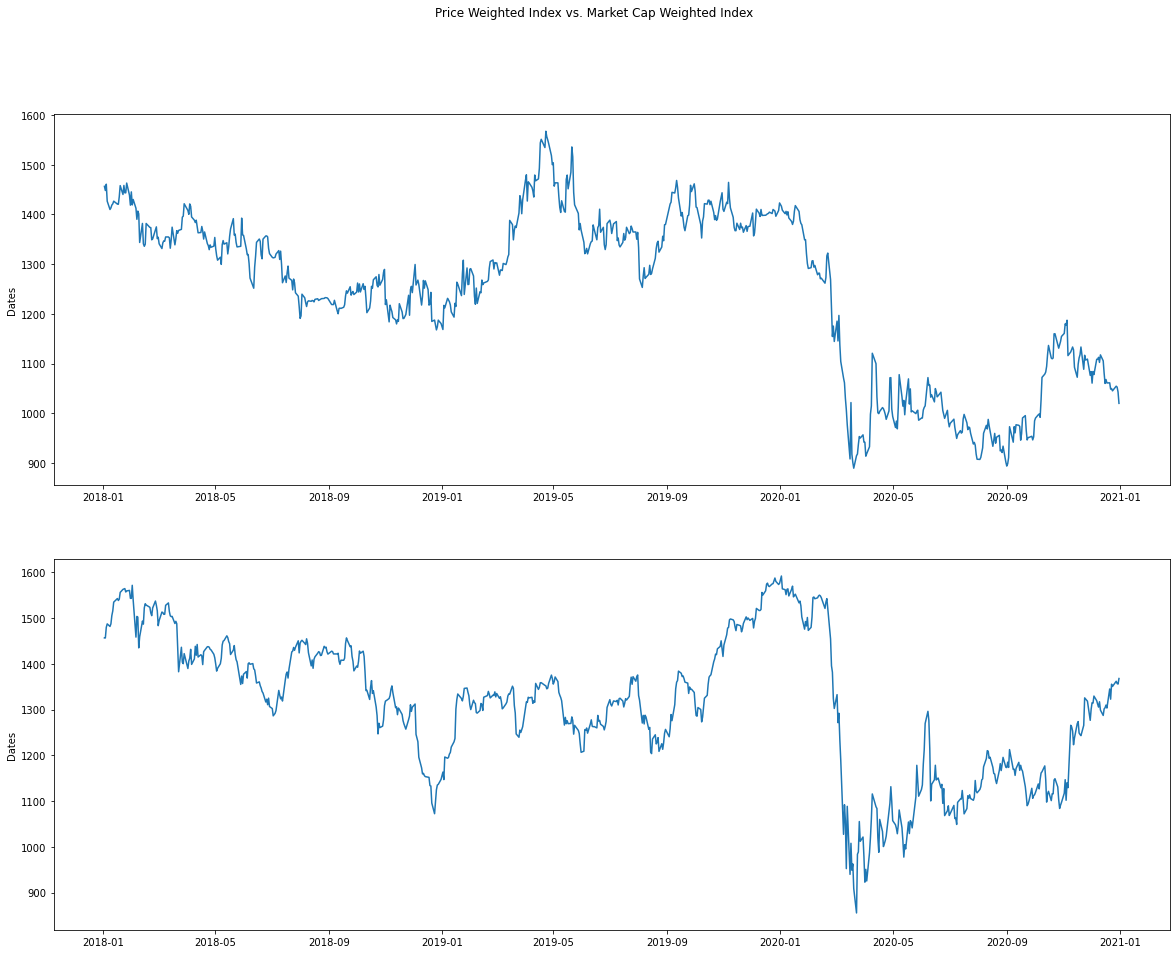

In [6]:
# Part A
#specify number of rows and columns (2,1) and define axes fro each plot
fig, ((ax1),(ax2))=plt.subplots(2,1)
fig.set_size_inches(20,15)

#Overall Titles
fig.suptitle('Price Weighted Index vs. Market Cap Weighted Index')

#subplot 1
ax1.plot(price_weighted_index.index,price_weighted_index['Portfolio Value'])

#subplot 2
ax2.plot(cap_weighted_index.index,cap_weighted_index['Portfolio Value'])

#Set X and Y Axis Labels
ax1.set_ylabel("Dates")
ax2.set_ylabel("Dates")

plt.show()

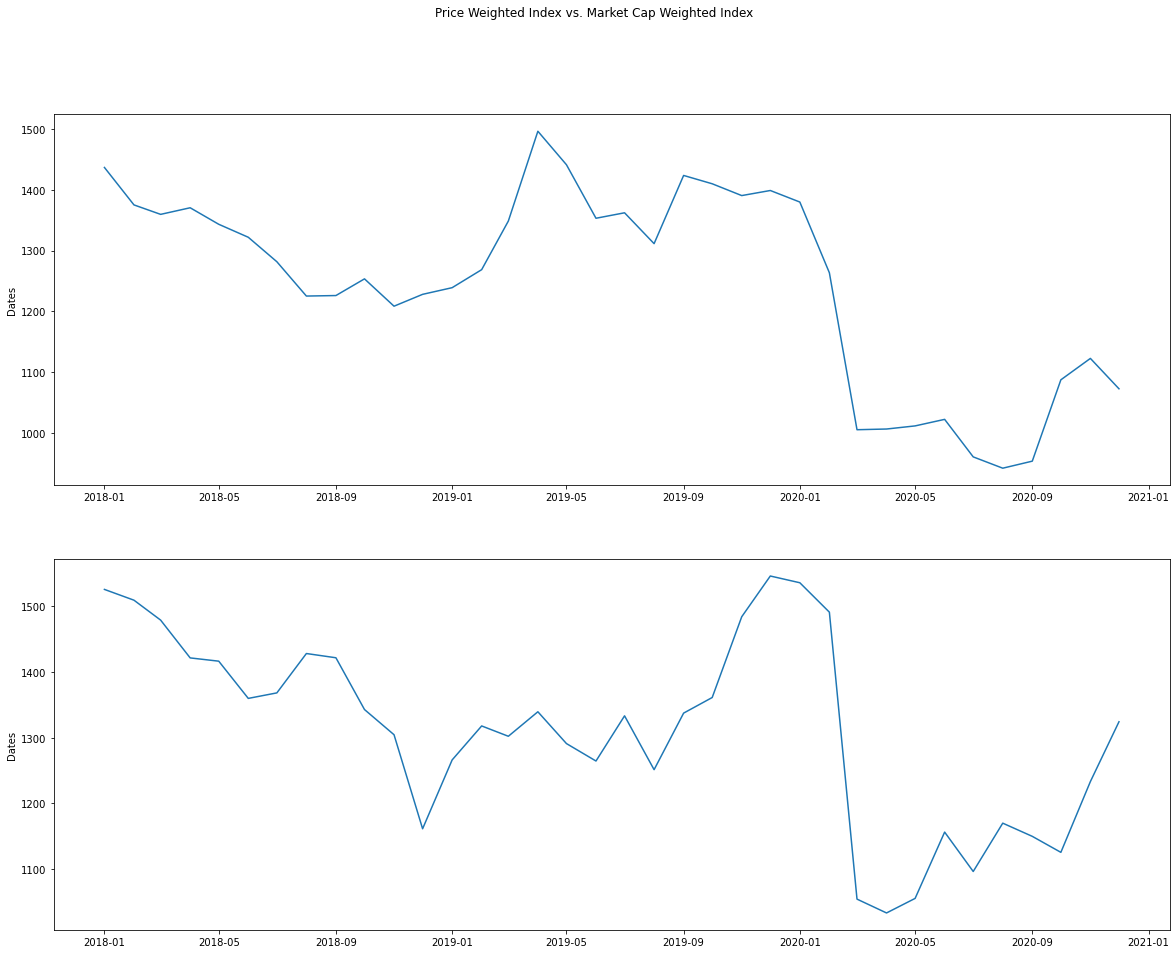

In [7]:
# Part B
monthly_data_price_weighted=price_weighted_index.resample('MS',label='left',closed='left').mean()

monthly_data_market_weighted=cap_weighted_index.resample('MS',label='left',closed='left').mean()

#specify number of rows and columns (2,1) and define axes fro each plot
fig, ((ax1),(ax2))=plt.subplots(2,1)
fig.set_size_inches(20,15)

#Overall Titles
fig.suptitle('Price Weighted Index vs. Market Cap Weighted Index')

#subplot 1
ax1.plot(monthly_data_price_weighted.index,monthly_data_price_weighted['Portfolio Value'])

#subplot 2
ax2.plot(monthly_data_market_weighted.index,monthly_data_market_weighted['Portfolio Value'])

#Set X and Y Axis Labels
ax1.set_ylabel("Dates")
ax2.set_ylabel("Dates")

plt.show()



#Part C

With the differences between the Price-Weighted & the Market-Cap was that overall followed a similar pattern over the 3 yrs but in Jan 2019 , the market-cap weighted index had a bigger crash compared to the price-weighted and in Jan 2021, while the price-weighted went down the market-cap index went up. My conclusion: **In a value-weight index, larger companies account for the bulk of moves in an index. In a price-weight index, small companies can have more effect.**

For the monthly vs. daily data, we see that the monthly data is not as accurate as it lowers the severity of the fluctuations seen but is good insturment when looking over long terms of data as long-term investors don't care much about daily fluctutations but the trend over time + fundemental analysis.

## Q3 - Returns


### a) Calculating Monthly Returns 
For the price method and the market cap method, calculate the one-period monthly returns (hint, if you want to save some time, consider using hte pct_change() method). Store the returns for each method in one DataFrame for each time frame so that it has the following columns: `Date`, `Index Value Return`, `Market Cap Return`. Display the last five values and then graph the two values superimposed in one plot. Make sure to include appropriate titles, axis labels and a legend.

Graph these returns for the data from 2018.  Remember to label your graph well.

In [8]:
%%latex
\newpage

<IPython.core.display.Latex object>

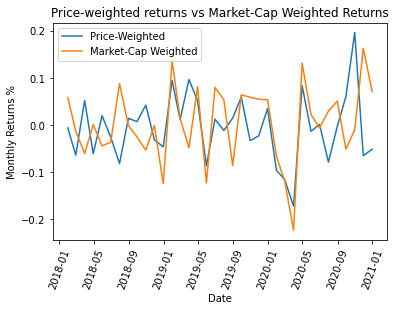

In [9]:
#Calculate percentage changes for each index
price_weighted_daily_returns=price_weighted_index['Portfolio Value'].pct_change()
cap_weighted_daily_returns=cap_weighted_index['Portfolio Value'].pct_change()

#add daily returns to dataframe
daily_returns=pd.DataFrame(price_weighted_daily_returns)
daily_returns['Market Cap Daily Returns']=cap_weighted_daily_returns

#resample daily returns to monthly
monthly_returns=daily_returns.resample('M').sum()

#Rename Columns
monthly_returns.columns=['Price-Weighted Monthly Returns','Market-Cap Weighted Monthly Returns']

monthly_returns.tail(5)

#Plot graphs
plt.plot(monthly_returns.index,monthly_returns['Price-Weighted Monthly Returns'], label='Price-Weighted')
plt.plot(monthly_returns.index,monthly_returns['Market-Cap Weighted Monthly Returns'], label='Market-Cap Weighted')
plt.xlabel('Date')
plt.ylabel('Monthly Returns %')
plt.title('Price-weighted returns vs Market-Cap Weighted Returns')
plt.xticks(rotation=70)
# Create legend
plt.legend(loc='best')
plt.show()

### b) Analysis

#### i. Discrepancies
Can you find any cases where the price index returns and market cap returns are going in opposite directions? When does this occur? If there are multiple occurrences, pick one stark region to discuss.  If there are no occurences where the returns move in opposite directions, choose a time when the slopes are signficantly different. 

We see the returns going in opposite directions between '2018-05' & '2018-09' and also seen in '2020-08'. For the price-weighted returns which are negative during these periods, it show probably goes to show that SEB, the stock with the highest-share price was probably affecting the index value bringing the negative returns as the other 2 shares are way smaller in price to affect the index value. 

In [10]:
%%latex
\newpage

<IPython.core.display.Latex object>

#### ii. Source of Discrepancy
Now that you have the time period, dig into the data to find what could have caused the discrepancies between the two measures' returns during this time period.  This part should be thoroughly quantitatively analyzed.  You should support your analysis with an equally thoroughly written discussion.   

We will be looking the period between '2018-05' to '2018-09'

In [11]:
analysis_dataframe = monthly_returns.rename_axis('Date').reset_index()

# Find period between '2018-05' to '2018-09'
period_dataframe=analysis_dataframe[(analysis_dataframe.Date >= '2018-05-01') & (analysis_dataframe.Date <= '2018-09-01')]

#print dataframe
period_dataframe.head()

discrepency=period_dataframe.loc[6]


#print the discrepency
discrepency

#Find the dataframe values for the date based on the discrpency computed before
discrepency_price_weighted=price_weighted_index.loc['2018-07-31']
discrepency_cap_weighted=cap_weighted_index.loc['2018-07-31']

#print both discrepencies
discrepency_price_weighted
discrepency_cap_weighted

MUFG                  6.120000
BAC                  28.688194
SEB                3609.905762
MUFG WEIGHT           0.246094
BAC WEIGHT            0.740777
SEB WEIGHT            0.013129
Portfolio Value    1423.865020
Name: 2018-07-31 00:00:00, dtype: float64

We found that the huge discprency of 16% between the values was on the date '2018-07-31'. 
We also found that the portfolio value for for the price-weighted index was only $1214$ while for the cap-weighted index it was $1423$. A $209 difference for the same date. This is because the BAC in the cap-weighted index has the largest market-cap and so holds the most influence in the index and that allowed that to raise the index value higher compared to the price-weighted index. When we look at the surronding index values for the cap-weighted index uptil '07-31'we can see the graph is trending up while its trending down for the price-weighted index


In [12]:
%%latex
\newpage

<IPython.core.display.Latex object>